#LUNG CANCER PREDICTION

---



In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
df.shape

(309, 16)

In [5]:
#Checking for Duplicates
df.duplicated().sum()

np.int64(33)

In [6]:
#Removing Duplicates
df=df.drop_duplicates()

In [7]:
#Checking for null values
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [9]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [11]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


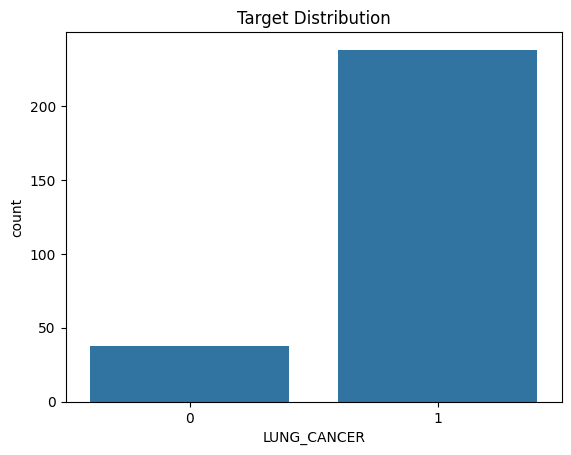

In [13]:
#Let's check the distributaion of Target variable.
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

In [14]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,238
0,38


In [15]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

In [16]:
#From the visualizations, it is clear that in the given dataset,
#the features GENDER, AGE, SMOKING and SHORTNESS OF BREATH don't have that much relationship with LUNG CANCER.
#So let's drop those features to make this dataset more clean.
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


In [17]:
#Finding Correlation
cn=df_new.corr()
cn

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


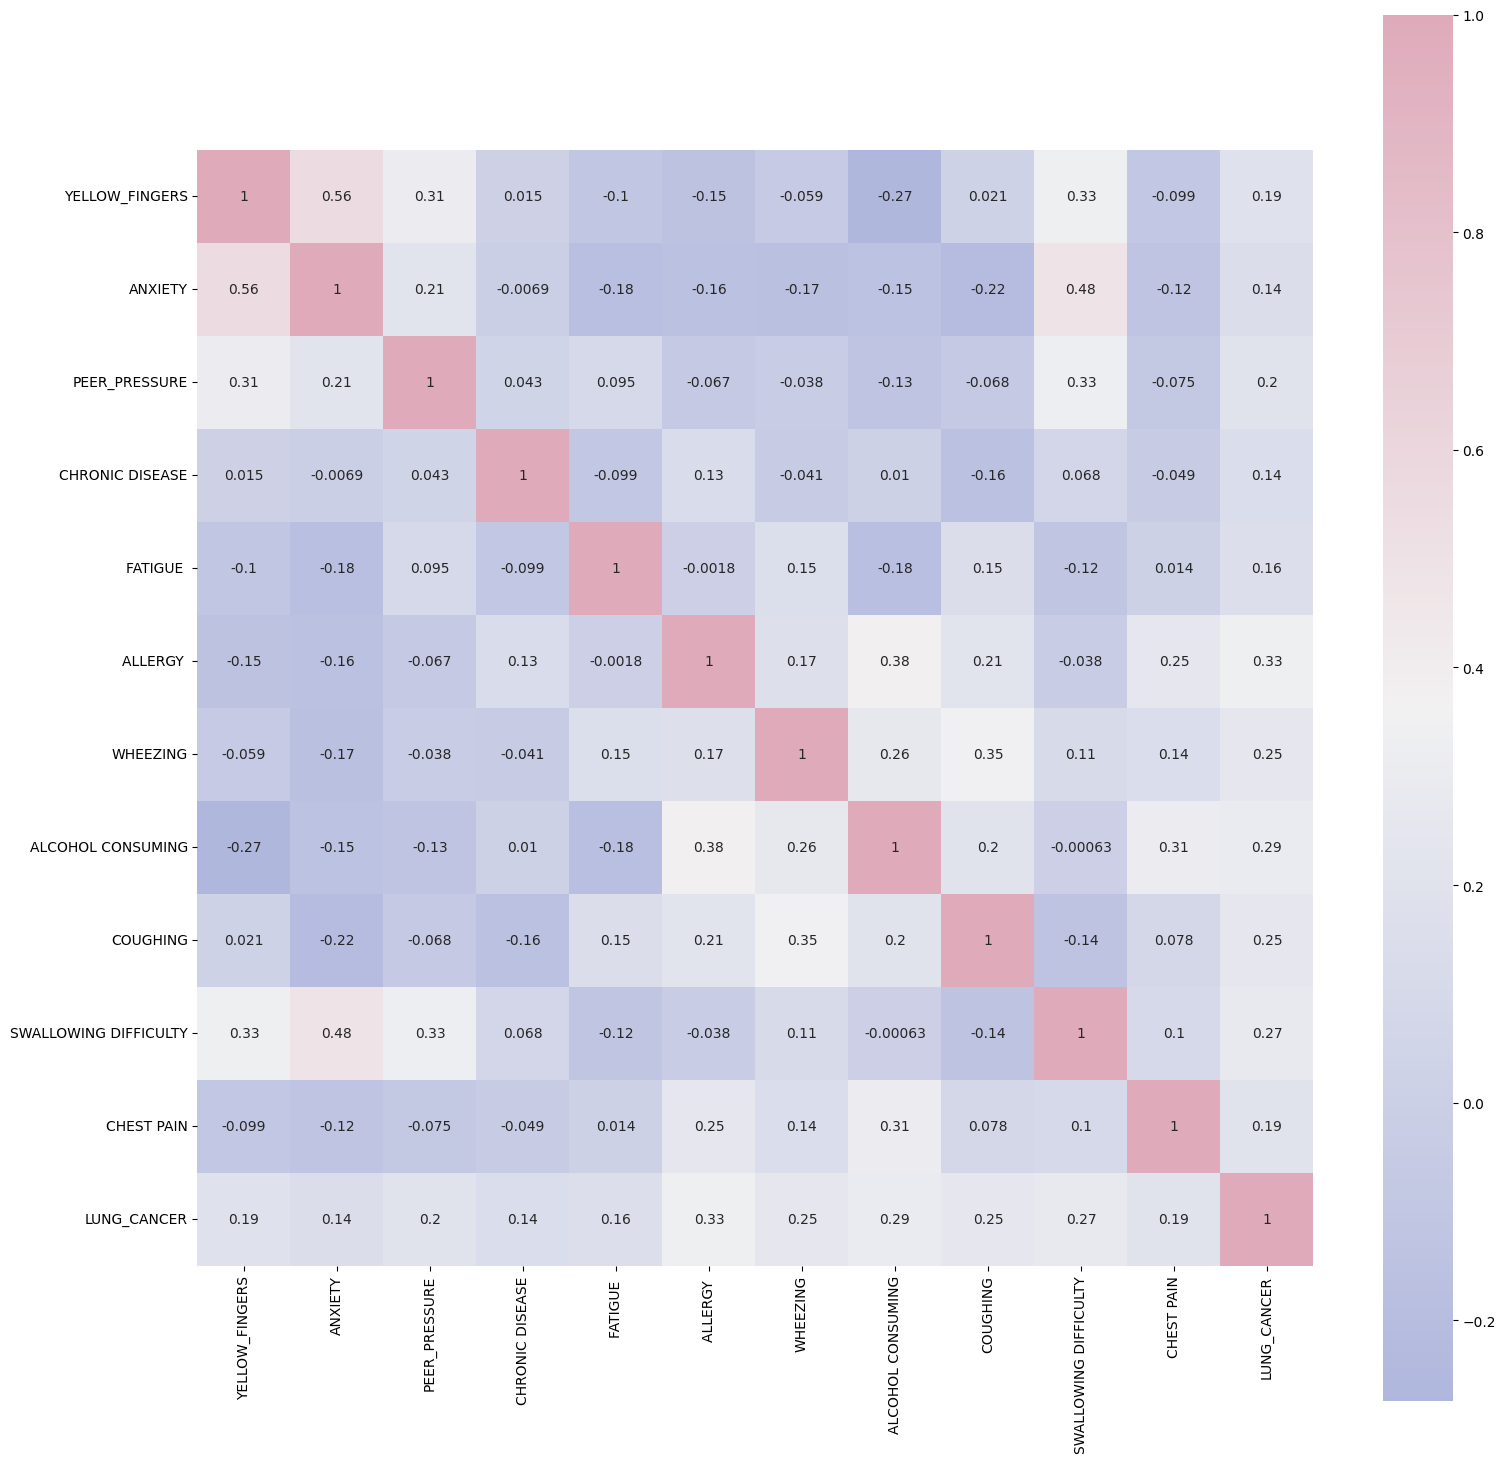

In [18]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

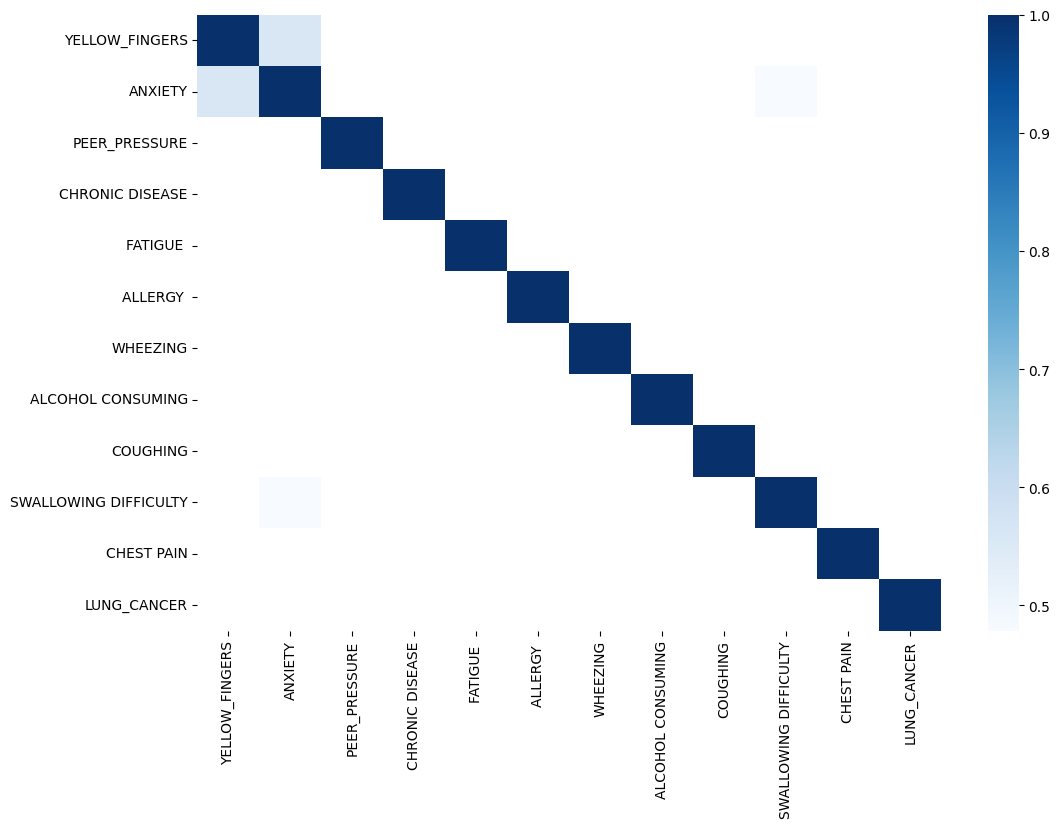

In [19]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

In [20]:
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1,1
280,0,0,0,1,1,1,0,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0,0
282,1,1,0,0,0,0,0,0,0,1,1,0,1


In [21]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

In [22]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [23]:
len(X)

477

##LOGISTIC REGRESSION

In [24]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [25]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [27]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        64
           1       1.00      0.95      0.97        56

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



##RANDOM FOREST CLASSIFIER

In [28]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [30]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        56

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## XGBOOST CLASSIFICATION

In [31]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [33]:
#Model accuracy
xgb_cr=classification_report(y_test, y_xgb_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.96      0.98      0.97        56

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



#LUNG CANCER PREDICTION USING IMAGE DATASET USING CNN

# Task
Build, compile, train, and evaluate a Convolutional Neural Network (CNN) model using the preprocessed image dataset for lung cancer prediction, then summarize its performance with key metrics and insights.

## Extract Image Dataset

### Subtask:
Extract the contents of the 'lung cancer image dataset.zip' file if it hasn't been extracted already, to access the image data.


**Reasoning**:
To extract the contents of the zip file, I need to import the `zipfile` module, specify the input zip file path and the output extraction directory, and then use `ZipFile` to extract all contents.



In [42]:
import zipfile
import os

# Specify the path to the zipped image dataset
zip_file_path = 'lung cancer image dataset.zip'

# Specify a directory name where the contents of the zip file will be extracted
extraction_dir = 'lung_cancer_images'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extraction_dir):
    os.makedirs(extraction_dir)

# Check if the zip file exists before attempting to extract
if os.path.exists(zip_file_path):
    # Create a ZipFile object for the specified zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents of the zip file into the designated extraction directory
        zip_ref.extractall(extraction_dir)
    print(f"'{zip_file_path}' extracted to '{extraction_dir}'")
else:
    print(f"Error: Zip file not found at '{zip_file_path}'")

'lung cancer image dataset.zip' extracted to 'lung_cancer_images'


## Load and Preprocess Images for CNN

### Subtask:
Load the images from the extracted dataset, resize them to a uniform size suitable for CNN input (e.g., 64x64 or 128x128), and normalize their pixel values. Organize them into features (X_images) and labels (y_images) while maintaining the image's 3D structure (height, width, channels).


**Reasoning**:
I will load the images from the extracted dataset, resize them, normalize pixel values, and organize them into features (X_images) and labels (y_images) as specified in the instructions. This involves using `cv2` for image processing and `os` for directory traversal.



In [43]:
import cv2
import os
import numpy as np

# 2. Define the base directory where the images are located.
base_image_dir = 'lung_cancer_images/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'

# 3. Define the desired image size for preprocessing
image_size = (128, 128) # Example: 128x128 pixels

# 4. Initialize empty lists for features and labels
X_images_list = []
y_images_list = []

# Define class mapping for labels
# Assuming 'Bengin cases' is 0 and 'Malignant cases' is 1
class_mapping = {
    'Bengin cases': 0,
    'Malignant cases': 1
}

# 5. Iterate through each subdirectory (class/label)
for label_name in os.listdir(base_image_dir):
    label_path = os.path.join(base_image_dir, label_name)
    if os.path.isdir(label_path):
        # Get the numerical label from the mapping
        label = class_mapping.get(label_name)
        if label is None:
            print(f"Warning: Unknown label directory '{label_name}'. Skipping.")
            continue

        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                # a. Read the image
                img = cv2.imread(image_path)
                if img is None:
                    print(f"Warning: Could not read image '{image_path}'. Skipping.")
                    continue

                # Ensure image has 3 channels if it's grayscale
                if len(img.shape) == 2:
                    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

                # b. Resize the image
                img_resized = cv2.resize(img, image_size)

                # c. Normalize the pixel values
                img_normalized = img_resized / 255.0

                # d. Append to features list
                X_images_list.append(img_normalized)

                # e. Append to labels list
                y_images_list.append(label)

# 7. Convert lists to NumPy arrays
X_images = np.array(X_images_list)
y_images = np.array(y_images_list)

# 8. Print the shapes to verify
print(f"Shape of X_images: {X_images.shape}")
print(f"Shape of y_images: {y_images.shape}")

Shape of X_images: (681, 128, 128, 3)
Shape of y_images: (681,)


## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed image features and their corresponding labels into training and testing sets for model development and evaluation.


**Reasoning**:
To divide the preprocessed image features and labels into training and testing sets, I will use `train_test_split` from `sklearn.model_selection` with a specified test size and random state.



In [44]:
from sklearn.model_selection import train_test_split
X_img_train, X_img_test, y_img_train, y_img_test = train_test_split(X_images, y_images, test_size=0.2, random_state=42)

print(f"Shape of X_img_train: {X_img_train.shape}")
print(f"Shape of X_img_test: {X_img_test.shape}")
print(f"Shape of y_img_train: {y_img_train.shape}")
print(f"Shape of y_img_test: {y_img_test.shape}")

Shape of X_img_train: (544, 128, 128, 3)
Shape of X_img_test: (137, 128, 128, 3)
Shape of y_img_train: (544,)
Shape of y_img_test: (137,)


## Build and Compile the CNN Model

### Subtask:
Define, compile, and summarize a Convolutional Neural Network (CNN) model for image classification. The model should include convolutional layers, pooling layers, and dense layers, and be compiled with an appropriate optimizer, loss function, and metrics.

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Train the CNN Model

### Subtask:
Train the compiled CNN model using the training image data (`X_img_train`, `y_img_train`) and validate its performance on the testing data (`X_img_test`, `y_img_test`).

#### Instructions:
1. Train the `model` using `X_img_train` and `y_img_train`.
2. Set the `epochs` to a reasonable number (e.g., 10 or 20).
3. Use a `batch_size` (e.g., 32).
4. Include `validation_data` with `X_img_test` and `y_img_test` to monitor performance on unseen data during training.

**Reasoning**:
Now that the CNN model is built and compiled, I will proceed to train it using the `fit` method. I will use the training data `X_img_train` and `y_img_train`, and include `validation_data` with `X_img_test` and `y_img_test` to monitor its performance during training.



In [46]:
history = model.fit(X_img_train, y_img_train, epochs=20, batch_size=32, validation_data=(X_img_test, y_img_test))

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7468 - loss: 0.6022 - val_accuracy: 0.8248 - val_loss: 0.4425
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8096 - loss: 0.4357 - val_accuracy: 0.8248 - val_loss: 0.3683
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8309 - loss: 0.3641 - val_accuracy: 0.8248 - val_loss: 0.3216
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8515 - loss: 0.2654 - val_accuracy: 0.8978 - val_loss: 0.2206
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9544 - loss: 0.1449 - val_accuracy: 0.9416 - val_loss: 0.1305
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9495 - loss: 0.1195 - val_accuracy: 0.9562 - val_loss: 0.1035
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9665 - loss: 0.0782 - val_accuracy: 0.9927 - val_loss: 0.0438
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9824 - loss: 0.0556 - val_accuracy: 0.9854 - val_loss:

## Train the CNN Model

### Subtask:
Train the compiled CNN model using the training image data (`X_img_train`, `y_img_train`) and validate its performance on the testing data (`X_img_test`, `y_img_test`).

#### Instructions:
1. Train the `model` using `X_img_train` and `y_img_train`.
2. Set the `epochs` to a reasonable number (e.g., 10 or 20).
3. Use a `batch_size` (e.g., 32).
4. Include `validation_data` with `X_img_test` and `y_img_test` to monitor performance on unseen data during training.

## Evaluate the CNN Model

### Subtask:
Evaluate the performance of the trained CNN model on the test dataset and report key metrics such as accuracy, precision, recall, and F1-score.

#### Instructions:
1. Use the trained `model` to make predictions on the `X_img_test` dataset.
2. Convert the predicted probabilities to binary class labels.
3. Calculate and print the classification report to display precision, recall, and F1-score.
4. Calculate and print the accuracy score.

**Reasoning**:
The CNN model has been trained. Now I will evaluate its performance on the test data by making predictions, converting them to binary labels, and then calculating and printing the classification report and accuracy score.



In [47]:
from sklearn.metrics import classification_report, accuracy_score

# 1. Use the trained model to make predictions on the X_img_test dataset
y_img_pred_prob = model.predict(X_img_test)

# 2. Convert the predicted probabilities to binary class labels (0 or 1)
y_img_pred = (y_img_pred_prob > 0.5).astype(int)

# 3. Calculate and print the classification report
print("Classification Report for CNN Model:")
print(classification_report(y_img_test, y_img_pred))

# 4. Calculate and print the accuracy score
cnn_accuracy = accuracy_score(y_img_test, y_img_pred)
print(f"Accuracy Score for CNN Model: {cnn_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 514ms/step
Classification Report for CNN Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00       113

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

Accuracy Score for CNN Model: 1.0000


## Show Sample Predictions and Images

### Subtask:
Display a few sample images from the test set along with their true labels and the CNN model's predicted labels to visually inspect the model's performance.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


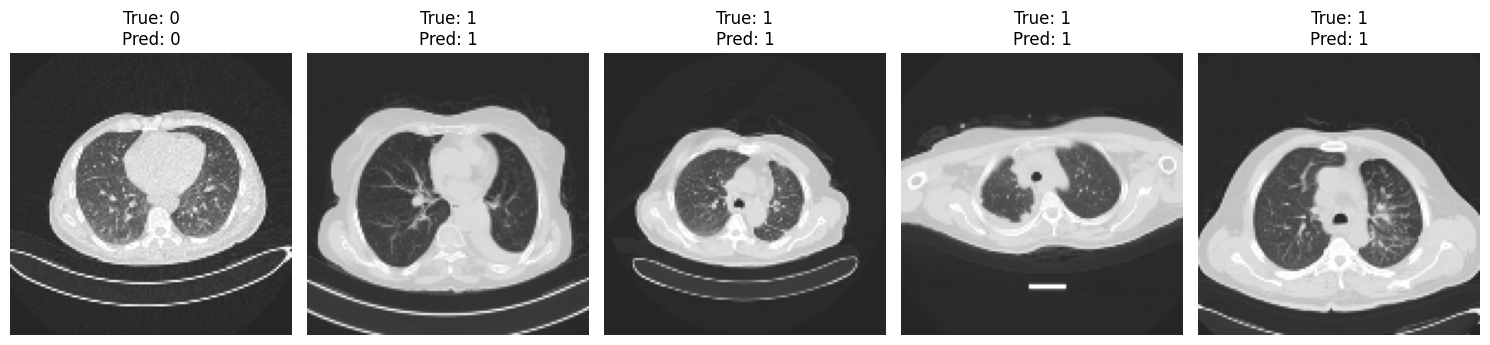

In [48]:
import matplotlib.pyplot as plt

# Select a small number of sample images to display
num_samples = 5
sample_indices = np.random.choice(len(X_img_test), num_samples, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    # Get the image, true label, and predicted label
    image = X_img_test[idx]
    true_label = y_img_test[idx]

    # The model expects a batch of images, so add a dimension
    predicted_prob = model.predict(np.expand_dims(image, axis=0))[0][0]
    predicted_label = (predicted_prob > 0.5).astype(int)

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image)
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()